# Rf 3 1 0_Sliceplot

Multidimensional models: projecting p.d.f and data slices in discrete observables




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:49 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Create B decay pdf with mixing
----------------------------------------------------------

Decay time observables

In [2]:
dt = ROOT.RooRealVar("dt", "dt", -20, 20)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Discrete observables mixState (B0tag==B0reco?) and tagFlav
(B0tag==B0(bar)?)

In [3]:
mixState = ROOT.RooCategory("mixState", "B0/B0bar mixing state")
tagFlav = ROOT.RooCategory("tagFlav", "Flavour of the tagged B0")

Define state labels of discrete observables

In [4]:
mixState.defineType("mixed", -1)
mixState.defineType("unmixed", 1)
tagFlav.defineType("B0", 1)
tagFlav.defineType("B0bar", -1)

False

Model parameters

In [5]:
dm = ROOT.RooRealVar("dm", "delta m(B)", 0.472, 0., 1.0)
tau = ROOT.RooRealVar("tau", "B0 decay time", 1.547, 1.0, 2.0)
w = ROOT.RooRealVar("w", "Flavor Mistag rate", 0.03, 0.0, 1.0)
dw = ROOT.RooRealVar(
    "dw", "Flavor Mistag rate difference between B0 and B0bar", 0.01)

Build a gaussian resolution model

In [6]:
bias1 = ROOT.RooRealVar("bias1", "bias1", 0)
sigma1 = ROOT.RooRealVar("sigma1", "sigma1", 0.01)
gm1 = ROOT.RooGaussModel("gm1", "gauss model 1", dt, bias1, sigma1)

Construct a decay pdf, with single gaussian resolution model

In [7]:
bmix_gm1 = ROOT.RooBMixDecay(
    "bmix",
    "decay",
    dt,
    mixState,
    tagFlav,
    tau,
    dm,
    w,
    dw,
    gm1,
    ROOT.RooBMixDecay.DoubleSided)

Generate BMixing data with above set of event errors

In [8]:
data = bmix_gm1.generate(ROOT.RooArgSet(dt, tagFlav, mixState), 20000)

Plot full decay distribution
----------------------------------------------------------

Create frame, data and pdf projection (integrated over tagFlav and
mixState)

In [9]:
frame = dt.frame(ROOT.RooFit.Title("Inclusive decay distribution"))
data.plotOn(frame)
bmix_gm1.plotOn(frame)

<ROOT.RooPlot object ("frame_dt_55864f7068e0") at 0x55864f7068e0>

[#1] INFO:Plotting -- RooAbsReal::plotOn(bmix) plot on dt integrates over variables (tagFlav,mixState)


Plot decay distribution for mixed and unmixed slice of mixState
-------------------------------------------------------------------------------------------

Create frame, data (mixed only)

In [10]:
frame2 = dt.frame(ROOT.RooFit.Title("Decay distribution of mixed events"))
data.plotOn(frame2, ROOT.RooFit.Cut("mixState==mixState::mixed"))

<ROOT.RooPlot object ("frame_dt_55864e4ade20") at 0x55864e4ade20>

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 3787 events out of 20000 total events


Position slice in mixState at "mixed" and plot slice of pdf in mixstate
over data (integrated over tagFlav)

In [11]:
bmix_gm1.plotOn(frame2, ROOT.RooFit.Slice(mixState, "mixed"))

<ROOT.RooPlot object ("frame_dt_55864e4ade20") at 0x55864e4ade20>

[#1] INFO:Plotting -- RooAbsReal::plotOn(bmix) plot on dt represents a slice in (mixState)
[#1] INFO:Plotting -- RooAbsReal::plotOn(bmix) plot on dt integrates over variables (tagFlav)


Create frame, data (unmixed only)

In [12]:
frame3 = dt.frame(ROOT.RooFit.Title(
    "Decay distribution of unmixed events"))
data.plotOn(frame3, ROOT.RooFit.Cut("mixState==mixState::unmixed"))

<ROOT.RooPlot object ("frame_dt_55864f7bd3b0") at 0x55864f7bd3b0>

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 16213 events out of 20000 total events


Position slice in mixState at "unmixed" and plot slice of pdf in
mixstate over data (integrated over tagFlav)

In [13]:
bmix_gm1.plotOn(frame3, ROOT.RooFit.Slice(mixState, "unmixed"))

c = ROOT.TCanvas("rf310_sliceplot", "rf310_sliceplot", 1200, 400)
c.Divide(3)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.4)
ROOT.gPad.SetLogy()
frame.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.4)
ROOT.gPad.SetLogy()
frame2.Draw()
c.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
frame3.GetYaxis().SetTitleOffset(1.4)
ROOT.gPad.SetLogy()
frame3.Draw()

c.SaveAs("rf310_sliceplot.png")

[#1] INFO:Plotting -- RooAbsReal::plotOn(bmix) plot on dt represents a slice in (mixState)
[#1] INFO:Plotting -- RooAbsReal::plotOn(bmix) plot on dt integrates over variables (tagFlav)


Info in <TCanvas::Print>: png file rf310_sliceplot.png has been created


Draw all canvases 

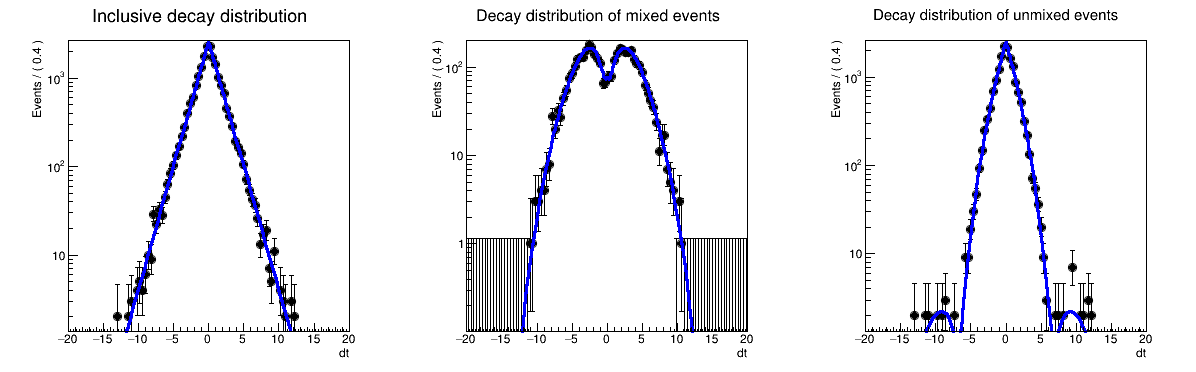

In [14]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()